## Imports 

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.cm as cm
from easygui import *

## Select File

In [2]:
path = fileopenbox()
img = cv.imread(path)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

## Detecting the document

In [3]:
# Solution 1

# Thresholding
thresh1 = cv.inRange(gray, 155, 255)

# Morphing the thresholded mask
shape = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7))

mask = cv.morphologyEx(thresh1,cv.MORPH_CLOSE,shape)
mask = cv.morphologyEx(mask,cv.MORPH_OPEN,shape)

# Detecting the contours & corners of the document

def getContours(img):
    contours,hierarchy = cv.findContours(img,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
    
    for cnt in contours:
        area = cv.contourArea(cnt)  
        if area>10000:
            print(area)
            print("Found Contour")
            cv.drawContours(border, cnt, -1, (255, 0, 0), 3)
            perimeter = cv.arcLength(cnt,True)
            approx = cv.approxPolyDP(cnt,0.02*perimeter,True)
            objCor = len(approx)
            print(objCor)
            x,y,w,h = cv.boundingRect(approx)
            
            for corner in approx:
                x = int(corner[0][0])
                y = int(corner[0][1])
                
                print("Corner:",x,y)
                
                cv.circle(corners,(x,y),10,(255,0,0),cv.FILLED)
                

border = np.zeros_like(img)
corners = np.zeros_like(img)
canny = cv.Canny(mask,50,50)
getContours(mask)



6105457.5
Found Contour
4
Corner: 1713 753
Corner: 0 1451
Corner: 1586 4271
Corner: 3384 2863


## Display Result 

<function matplotlib.pyplot.show(close=None, block=None)>

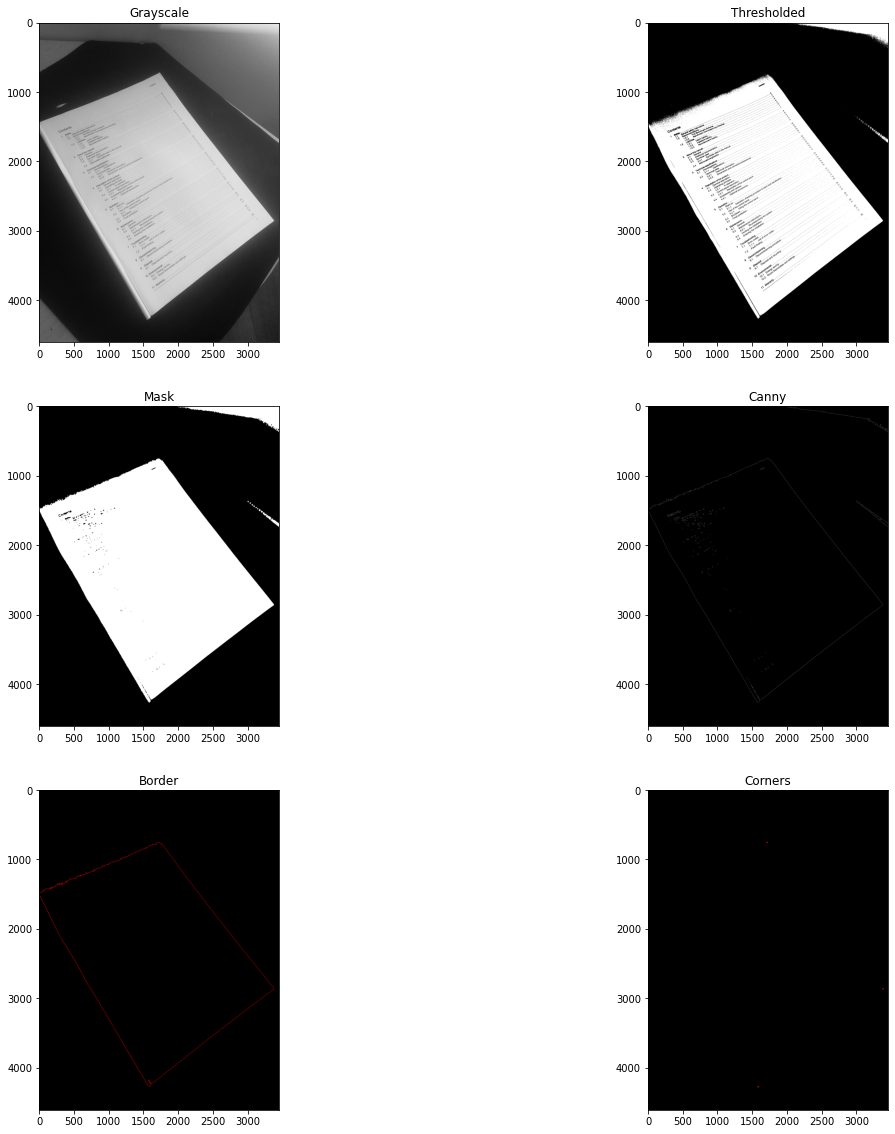

In [4]:
fig, ax = plt.subplots(ncols = 2, nrows = 3,figsize=(20,20))

ax[0,0].imshow(gray,cmap = cm.gray)
ax[0,0].set_title('Grayscale')

ax[0,1].imshow(thresh1,cmap = cm.gray)
ax[0,1].set_title('Thresholded')

ax[1,0].imshow(mask,cmap = cm.gray)
ax[1,0].set_title('Mask')

ax[1,1].imshow(canny,cmap = cm.gray)
ax[1,1].set_title('Canny')

ax[2,0].imshow(border)
ax[2,0].set_title('Border')

ax[2,1].imshow(corners)
ax[2,1].set_title('Corners')

plt.show